In [3]:
import glob
import csv
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
dic = {}

for files in glob.glob('C:\\Users\\madhu\\Desktop\\Repositories\\Data_Science_2019501105\\DADV\\Exam_2021_2019501105\\Week\\*.csv'):
    f=open(files, 'r')
    name = os.path.basename(f.name).replace(".csv","")
    data = pd.read_csv(f)
    close = data["gainORloss"]
    val = close[len(close) - 1] - close[1]
    dic[name] = val
    f.close()

In [3]:
len(dic)

58

In [4]:
#sorting a dictionary
sorteddic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse = True)}

In [5]:
k = 1
top_dict = {}
for each in sorteddic.keys():
    top_dict[each] = sorteddic.get(each)
    k = k+1
    if(k == 26):
        break
        
dictio_keys = list(top_dict.keys())
dictio_values = list(top_dict.values())
df = pd.DataFrame()
df["Company"] = dictio_keys
df["Value"] = dictio_values 
df.to_csv("top_week.csv",index=False)
top_dict

{'AXP': 0.07699178413541241,
 'AMZN': 0.0633064384271349,
 'ANET': 0.06311144208198205,
 'ANSS': 0.04151912957332482,
 'GOOG': 0.04071907861247759,
 'GOOGL': 0.038317221502552457,
 'ABC': 0.033937942563549095,
 'AWK': 0.033584284297460965,
 'AIG': 0.03319502074688807,
 'ABMD': 0.030007919096159297,
 'AES': 0.024096385542168308,
 'ALB': 0.023017902813299296,
 'AOS': 0.022674981890990376,
 'ALK': 0.02202168560975193,
 'AJG': 0.021723652683669492,
 'AVY': 0.021657953090236326,
 'AIZ': 0.02034045518293759,
 'APA': 0.02002417322016492,
 'APD': 0.019847253988157565,
 'ALL': 0.01983518502360271,
 'AAL': 0.019452758004548043,
 'ANTM': 0.017914817864361554,
 'AEP': 0.016359962260589667,
 'AFL': 0.015901016252230837,
 'ACN': 0.014959641363174292}

In [6]:
sorteddicrev = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}

In [7]:
k = 1
bottom_dict = {}
for each in sorteddicrev.keys():
    bottom_dict[each] = sorteddicrev.get(each)
    k = k+1
    if(k == 26):
        break
        
botmdictio_keys = list(bottom_dict.keys())
botmdictio_values = list(bottom_dict.values())
df = pd.DataFrame()
df["Company"] = botmdictio_keys
df["Value"] = botmdictio_values 
df.to_csv("bottom_week.csv",index=False)
bottom_dict

{'MO': -0.11742095055041091,
 'AMAT': -0.0974750440399288,
 'ALGN': -0.05929491069306536,
 'AAPL': -0.05436879073135392,
 'AVB': -0.03518371465107606,
 'ADI': -0.033645242120204255,
 'ALXN': -0.03340135492114804,
 'AAP': -0.027467221906954276,
 'AZO': -0.018444531253352547,
 'AMT': -0.016688618675472888,
 'T': -0.01355641843417521,
 'ARE': -0.006183017159529847,
 'APH': -0.004694308234882261,
 'AKAM': -0.001823239754982886,
 'AMGN': 0.0004663208261403984,
 'ALLE': 0.002241911504424765,
 'A': 0.005033367652107934,
 'ADBE': 0.005238887292690508,
 'AMD': 0.006006006006006093,
 'ATVI': 0.006334931840048075,
 'ADM': 0.006593384615384501,
 'ADSK': 0.007072011901668507,
 'ABBV': 0.00831529175626966,
 'AMCR': 0.00921658986175089,
 'APTV': 0.00926886824861195}

In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import math
from scipy import interpolate
corrlis = []
for each1 in top_dict.keys():
    for each2 in top_dict.keys():
        corr_value = np.corrcoef(top_dict.get(each1), top_dict.get(each2))[0][1]
        corrlis.append(corr_value)
        
len(corrlis)

625

In [4]:
top_data = pd.read_csv("top_week.csv")
bottom_data = pd.read_csv("bottom_week.csv")
gicssectors = pd.read_csv("GICSSector.csv")
day_topdata = pd.merge(top_data, gicssectors, on="Company")
day_bottomdata = pd.merge(bottom_data, gicssectors, on="Company")

In [5]:
day_topdata_name = list(day_topdata["GICS_Sector"])
day_bottomdata_name = list(day_bottomdata["GICS_Sector"])

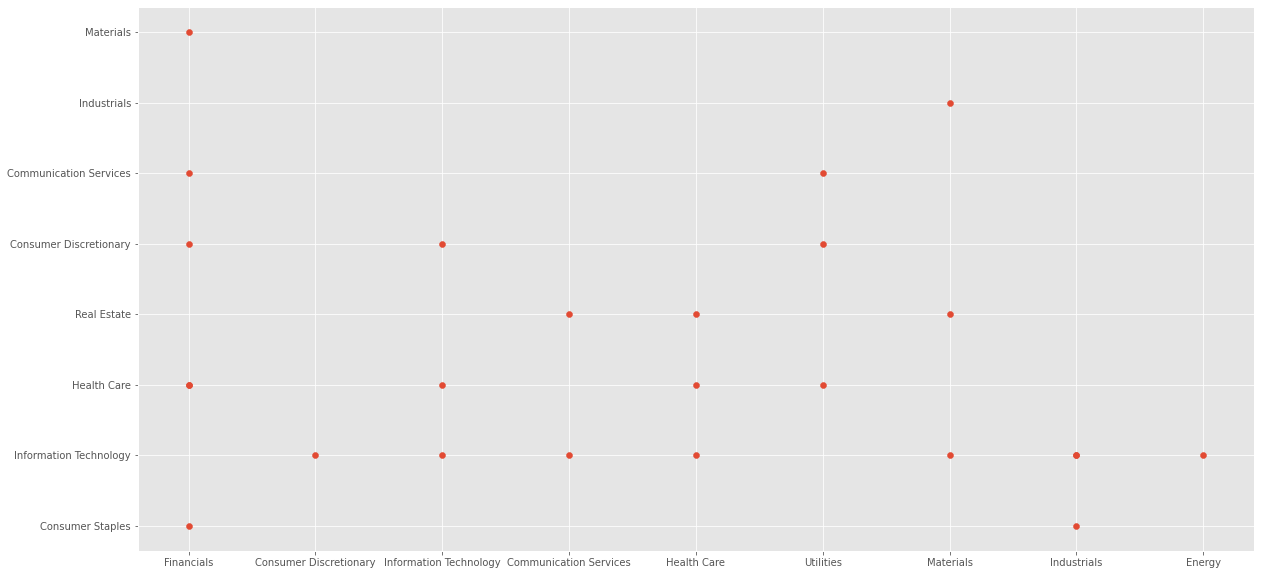

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(day_topdata_name, day_bottomdata_name)
plt.show()